# A1. QUESTION FOR ANALYSIS
Do customers with a shorter duration of service (Tenure) have a higher likelihood of discontinuing their services (Churning)?



# 




# A2. BENEFIT FROM ANALYSIS
Analyzing this data can benefit stakeholders by providing insights into whether a customer's length of tenure is correlated with their likelihood to discontinue their services (i.e. churn). If such a correlation is found, stakeholders may need to prioritize services that cater to long-term customers to reduce churn rates.






#  




# A3. DATA IDENTIFICATION

The dataset contains variables that are pertinent to answering the research question, namely:

- Tenure: This numerical attribute indicates the duration in months for which a customer has been subscribed to a network provider.
- Churn: A discrete attribute that determines whether a customer stopped using the services of their network provider. It has two values, "Yes" and "No".






# 







# B1. CODE

In [1]:
#Import all the libraries necessary to this research

# Statistical Analysis library
import scipy.stats as stats

#Data Preparation and Analysis Libraries
import pandas as pd
import numpy as np

#Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the churn raw data set and display the first few rows

churn_data = pd.read_csv('churn_clean.csv')
pd.options.display.max_columns = None
churn_data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
# Display detailed information about the variables in the churn data set

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
# Generate distinct variables for Tenure with respect to Customer Churn.

Yes = []
No = []

for i in range(len(churn_data)):
    if churn_data['Churn'][i] == 'Yes':
        Yes.append(churn_data['Tenure'][i])
    else:
        No.append(churn_data['Tenure'][i])

In [5]:
# Define a T-test with respect to these variables (Reference G1)

ttest = (stats.ttest_ind(Yes,No))

# 




# B2. OUTPUT

In [6]:
# Results of the T-test

print("These resuts of the T-test as follows: ", ttest)

These resuts of the T-test as follows:  Ttest_indResult(statistic=-55.52487046681211, pvalue=0.0)


#  






# B3. JUSTIFICATION

I opted for a T-test as my analysis technique for the following reasons:

- The variables relevant to answering the research question have different natures. Tenure is a numerical variable, while Churn is a discrete variable with two categories.
- According to Kumar (2021), a two-sample T-test is suitable for experiments that aim to investigate the relationship between a continuous variable and a categorical variable with two categories.
- Other statisticaal tests like ANOVA and Chi-square tests are unsuitable for this analysis. Chi-square tests are more appropriate for comparing two categorical random variables and ANOVA tests are used to detect differences between one continuous variable and a discrete variable with more than two categories (Kumar, 2021).






# 







# C.  UNIVARIATE STATISTICS



In [7]:
# Create a new dataframe from the prepared data that includes both categorical and continuous variables 
# for conducting univariate statistics. 

uni_churn_data = churn_data[['Tablet', 'Churn', 'Tenure', 'Bandwidth_GB_Year',]] 

In [8]:
# View first five rows

uni_churn_data.head()

,Tablet,Churn,Tenure,Bandwidth_GB_Year
0,Yes,No,6.795513,904.536110
1,Yes,Yes,1.156681,800.982766
2,No,No,15.754144,2054.706961
3,No,No,17.087227,2164.579412
4,No,Yes,1.670972,271.493436


In [9]:
# Display detailed information about the variables in the new data set

uni_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tablet             10000 non-null  object 
 1   Churn              10000 non-null  object 
 2   Tenure             10000 non-null  float64
 3   Bandwidth_GB_Year  10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [10]:
# Summary statistics of numerical attributes

uni_churn_data.describe()

,Tenure,Bandwidth_GB_Year
count,10000.000000,10000.000000
mean,34.526188,3392.341550
std,26.443063,2185.294852
min,1.000259,155.506715
25%,7.917694,1236.470827
50%,35.430507,3279.536903
75%,61.479795,5586.141370
max,71.999280,7158.981530


In [11]:
# Summary statistics of numerical attributes when Churn is 'Yes'

churn_data_yes = uni_churn_data[uni_churn_data.Churn=='Yes']
churn_data_yes.describe()

,Tenure,Bandwidth_GB_Year
count,2650.000000,2650.000000
mean,13.147667,1785.009247
std,15.577072,1375.370184
min,1.000259,248.179366
25%,4.073001,981.303767
50%,7.874490,1357.828274
75%,13.761794,1904.882596
max,71.645510,7096.494932


In [12]:
# Summary statistics of numerical attributes when Churn is 'No'

churn_data_no = uni_churn_data[uni_churn_data.Churn=='No']
churn_data_no.describe()

,Tenure,Bandwidth_GB_Year
count,7350.000000,7350.000000
mean,42.234090,3971.855917
std,25.292018,2132.649474
min,1.005104,155.506715
25%,12.472424,1547.500312
50%,53.774145,4895.174571
75%,64.226645,5796.611147
max,71.999280,7158.981530


In [13]:
# Summary statistics of numerical attributes when Tablet is 'Yes'

tab_yes = uni_churn_data[uni_churn_data.Tablet=='Yes']
tab_yes.describe()

,Tenure,Bandwidth_GB_Year
count,2991.000000,2991.000000
mean,34.548228,3399.461980
std,26.640047,2205.148134
min,1.033068,223.476583
25%,7.748983,1217.440171
50%,37.235310,3432.332098
75%,61.689180,5626.734479
max,71.999280,7021.936560


In [14]:
# Summary statistics of numerical attributes when Tablet is 'No'

tab_no = uni_churn_data[uni_churn_data.Tablet=='No']
tab_no.describe()

,Tenure,Bandwidth_GB_Year
count,7009.000000,7009.000000
mean,34.516783,3389.302998
std,26.360457,2176.918666
min,1.000259,155.506715
25%,8.013366,1244.296865
50%,32.733580,3232.873635
75%,61.360370,5566.092166
max,71.994180,7158.981530


In [15]:
# Show percentage distribution of each categorical attribute (Reference G2)

print(uni_churn_data['Churn'].value_counts(normalize=True))

print('\n')

print(uni_churn_data['Tablet'].value_counts(normalize=True))

No     0.735
Yes    0.265
Name: Churn, dtype: float64


No     0.7009
Yes    0.2991
Name: Tablet, dtype: float64


# 











# C1. VISUAL OF FINDINGS

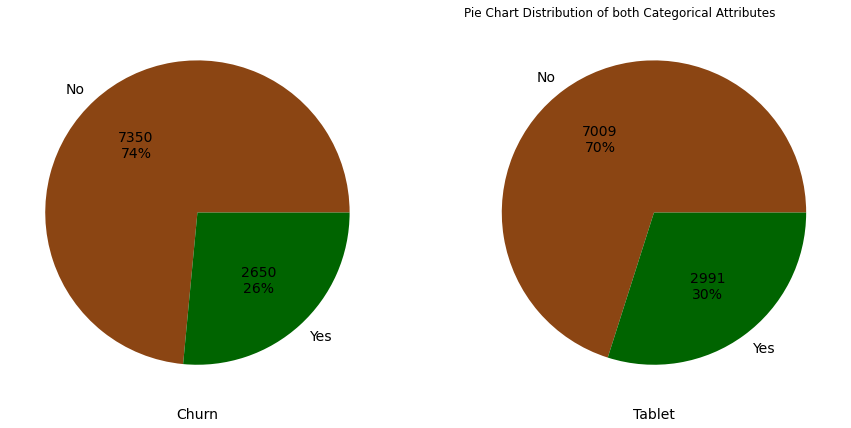

In [16]:
# Visualize Pie Chart of Discrete Attributes. (Reference G3)

def labels_percent(val):
    return f'{val / 100 * len(churn_data):.0f}\n{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 8))
colors = ['saddlebrown', 'darkgreen']

uni_churn_data.groupby('Churn').size().plot(kind ='pie', textprops = {'fontsize': 14}, ax = ax1, autopct=labels_percent, colors=colors)
ax1.set_xlabel('Churn', size = 14)
ax1.set_ylabel(None)

uni_churn_data.groupby('Tablet').size().plot(kind = 'pie', textprops = {'fontsize': 14}, ax = ax2, autopct=labels_percent, colors=colors)
ax2.set_xlabel('Tablet', size = 14)
ax2.set_ylabel(None)

plt.title('Pie Chart Distribution of both Categorical Attributes',  loc='left')
plt.show()

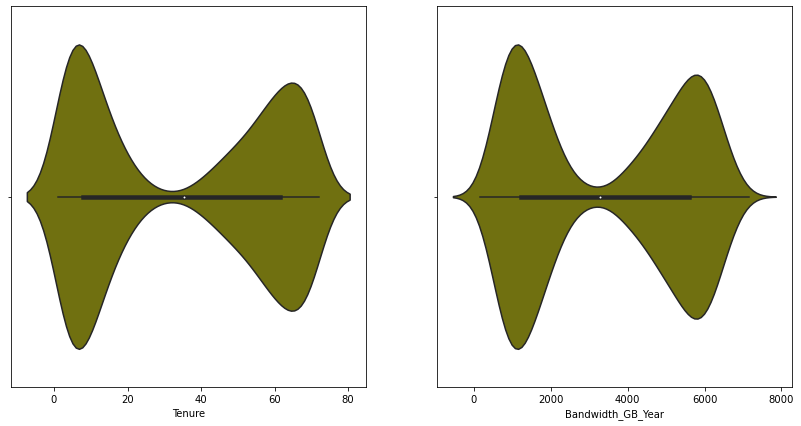

In [17]:
# Visualize violinplots of continuous attributes

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

columns = ['Tenure', 'Bandwidth_GB_Year']

for i, col in enumerate(columns):
    if i < 2:
        plt.subplot(1, 2, i+1)
        sns.violinplot(x=uni_churn_data[col], color='olive')
    else:
        plt.subplot(1, 2, i+2)
        sns.violinplot(x=uni_churn_data[col], color='olive')

plt.show()

#    













# D. BIVARIATE STATISTICS

In [18]:
# Create a new dataframe from the prepared data that includes both categorical and continuous variables 
# for conducting bivariate statistics.

bi_churn_data = churn_data[['Tablet', 'Churn', 'Tenure', 'Bandwidth_GB_Year',]]  
bi_churn_data.head()

,Tablet,Churn,Tenure,Bandwidth_GB_Year
0,Yes,No,6.795513,904.536110
1,Yes,Yes,1.156681,800.982766
2,No,No,15.754144,2054.706961
3,No,No,17.087227,2164.579412
4,No,Yes,1.670972,271.493436


In [19]:
# Correlation matrix of Continuous attributes (Reference G4)

cm = bi_churn_data.corr()
cm

,Tenure,Bandwidth_GB_Year
Tenure,1.000000,0.991495
Bandwidth_GB_Year,0.991495,1.000000


The correlation matrix above shows a very wak relationship between the MonthlyCHrge and Tenure

In [20]:
# Cross Tabulation of Tablet by Churn (Reference G5)

ct = pd.crosstab(index = bi_churn_data['Churn'], columns = bi_churn_data['Tablet'])
ct

Tablet,No,Yes
Churn,,
No,5146,2204
Yes,1863,787


In [21]:
# Cross Tabulation of Churn by Tablet (Reference G5)

ct = pd.crosstab(index = bi_churn_data['Tablet'], columns = bi_churn_data['Churn'])
ct

Churn,No,Yes
Tablet,,
No,5146,1863
Yes,2204,787


#  














# D1. VISUAL OF FINDINGS

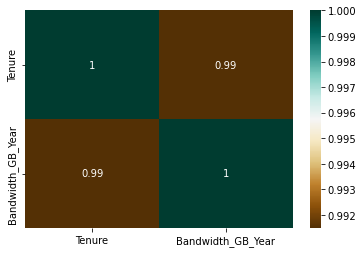

In [22]:
# Visualize correlation between the continuous attributes using heatmap

sns.heatmap(cm, annot = True, cmap='BrBG')
plt.show()

<AxesSubplot:xlabel='Tablet'>

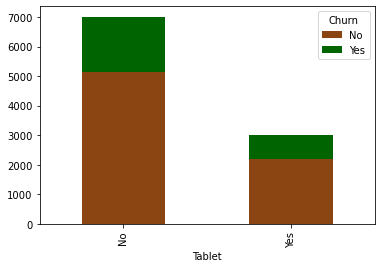

In [23]:
# Visualize Tablet by Churn

colors = ['saddlebrown', 'darkgreen']
tbl = pd.pivot_table(bi_churn_data.groupby(['Tablet', 'Churn']).size().reset_index(),
                     values=0,
                     index='Tablet',
                     columns=['Churn'],
                     aggfunc=np.sum)

tbl.plot(kind='bar', stacked=True, color=colors)

<AxesSubplot:xlabel='Churn'>

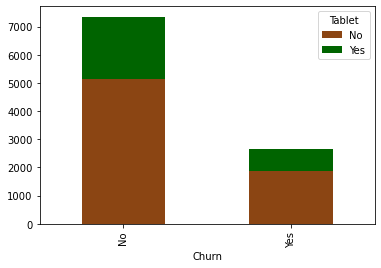

In [24]:
# Visualize Churn by Tablet

colors = ['saddlebrown', 'darkgreen']
tbl = pd.pivot_table(bi_churn_data.groupby(['Churn','Tablet']).size().reset_index(),
                     values=0,
                     index='Churn',
                     columns=['Tablet'],
                     aggfunc=np.sum)

tbl.plot(kind='bar', stacked=True, color=colors)

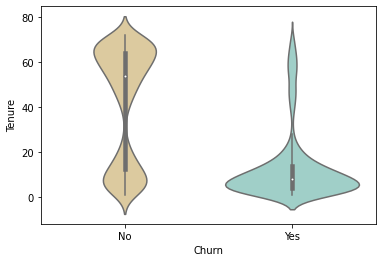

In [25]:
# Visualize Churn by Tenure

ax = sns.violinplot(x= 'Churn', y = 'Tenure', data=bi_churn_data, palette='BrBG')

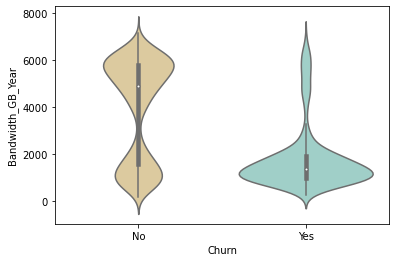

In [26]:
# Visualize Churn by Bandwidth_GB_Year

ax = sns.violinplot(x= 'Churn', y = 'Bandwidth_GB_Year', data=bi_churn_data, palette='BrBG')

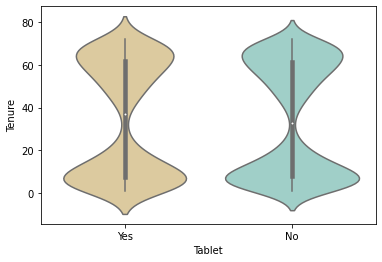

In [27]:
# Visualize Tablet by Tenure

ax = sns.violinplot(x= 'Tablet', y = 'Tenure', data=bi_churn_data, palette='BrBG')

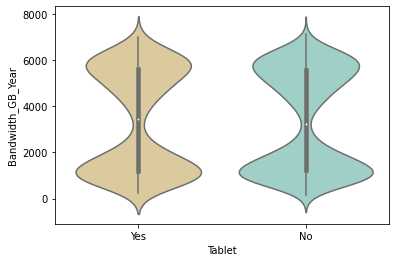

In [28]:
# Visualize Tablet by Bandwidth_GB_Year

ax = sns.violinplot(x= 'Tablet', y = 'Bandwidth_GB_Year', data=bi_churn_data, palette='BrBG')

#     
















#  E1. RESULTS OF ANALYSIS
The hypothesis test performed above consists of:

- $H_{0}$: customers with a shorter duration of service (Tenure) do not have a higher likelihood of discontinuing their services (Churning)
- $H_{1}$: customers with a shorter duration of service (Tenure) have a higher likelihood of discontinuing their services (Churning)

The results of the T-test performed are as follows:

- The test produced a p-value of 0, indicating a potential inverse correlation between the number of months a customer has stayed with a provider and the probability of them unsubscribing from their services.
- This inverse correlation can be observed in D1, a histogram plot of average tenure by churn. The plot shows that customers who choose to churn have a lower average tenure, whereas customers who choose to continue their services have a higher average tenure. The lower the tenure, the higher the probability of churning and vice versa.
 - Therefore, the null hypothesis can be rejected, providing evidence that customers with a shorter duration of service are indeed more likely to discontinue their services.









#   











# E2. LIMITATIONS OF ANALYSIS
The limitations discovered are as follows:
 - Sampling Method: Instead of using a random sampling method from the 10,000 records available, the whole data set was used. This may have limited the potential benefits of random sampling, such as reducing bias and making the process simpler. (Horton M, 2021)

- Normality: A T-test is used to compare certain features between groups, and for the mean value to be a representative, the population needs to be normally distributed. However, it was not assessed whether the data followed a normal distribution, which is a critical requirement for a T-test. (Anesthesiol K, 2019)













#  













# E3.  RECOMMENDED COURSE OF ACTION
The results of the above experiment suggest that network providers may not give enough attention to customers with shorter tenures, leading to higher rates of customer churn. To address this, stakeholders should focus more on retaining these customers by implementing strategic policies such as loyalty programs, milestone rewards, and sign-up bonuses. Educating new customers on the benefits of their services can also help to reduce the rate at which lower tenured customers discontinue their services and increase customer retention. By implementing these measures, network providers can ensure that they retain more customers and increase customer satisfaction.

#   





# F. PANOPTO VIDEO


https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=52d8a38f-db16-4725-88f5-afcf00ed7a97

#   





# G. SOURCES FOR THIRD-PARTY CODE


G1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

G2. https://stackoverflow.com/questions/14281871/given-a-pandas-series-that-represents-frequencies-of-a-value-how-can-i-turn-tho

G3. https://stackoverflow.com/questions/63687789/how-do-i-create-a-pie-chart-using-categorical-data-in-matplotlib

G4. https://stackoverflow.com/questions/49350445/correlation-coefficient-of-two-columns-in-pandas-dataframe-with-corr

G5. https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

#   






# H. SOURCES

1. Kumar S (2021, March 15). How to know which Statistical Test to use for Hypothesis Testing?. Retrieved January 14, 2022 at https://towardsdatascience.com/how-to-know-which-statistical-test-to-use-for-hypothesis-testing-744c91685a5d


2. Horton M (2021, May 17). Simple Random Sample: Advantages and Disadvantages. Retrieved January 14, 2022 at https://www.investopedia.com/ask/answers/042815/what-are-disadvantages-using-simple-random-sample-approximate-larger-population.asp


3. Anesthesiol K (2021, August) More about the basic assumptions of t-test: normality and sample size. Retrieved January 14, 2022 at https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6676026/